In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error


In [4]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real IBM Stock Price")
    plt.plot(prediction, color="blue",label="predicted IBM Stock price")
    plt.title("IBM Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("IBM Stock Price")
    plt.legend()
    plt.show()

In [70]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))

In [7]:
df = pd.read_csv("C:/Users/Shubhang/Downloads/AABA_2006-01-01_to_2018-01-01.csv",index_col='Date',parse_dates=["Date"])

In [8]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [10]:
import seaborn as sns

In [18]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [20]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [23]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


In [30]:
trainning_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

In [36]:
len(trainning_set)

2768

In [37]:
len(test_set)

251

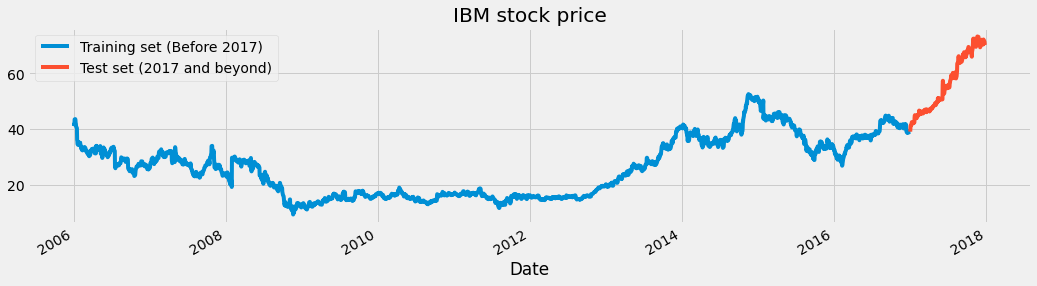

In [47]:
df["High"][:'2016'].plot(figsize=(16,4),legend=True)
df["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [49]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(trainning_set)

In [53]:
len(training_set_scaled)

2768

In [54]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [68]:
X_train

array([[[0.73574409],
        [0.75150672],
        [0.74756606],
        ...,
        [0.52387575],
        [0.5336115 ],
        [0.54311544]],

       [[0.75150672],
        [0.74756606],
        [0.7902179 ],
        ...,
        [0.5336115 ],
        [0.54311544],
        [0.54126101]],

       [[0.74756606],
        [0.7902179 ],
        [0.79230413],
        ...,
        [0.54311544],
        [0.54126101],
        [0.53662494]],

       ...,

       [[0.78117756],
        [0.78859527],
        [0.797172  ],
        ...,
        [0.67941586],
        [0.67987946],
        [0.68567455]],

       [[0.78859527],
        [0.797172  ],
        [0.79601298],
        ...,
        [0.67987946],
        [0.68567455],
        [0.6893834 ]],

       [[0.797172  ],
        [0.79601298],
        [0.79276773],
        ...,
        [0.68567455],
        [0.6893834 ],
        [0.6826611 ]]])

In [65]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 10s 67ms/step - loss: 0.0142
Epoch 2/50
85/85 [==============================] - 6s 71ms/step - loss: 0.0061
Epoch 3/50
85/85 [==============================] - 8s 90ms/step - loss: 0.0054
Epoch 4/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0046
Epoch 5/50
85/85 [==============================] - 10s 122ms/step - loss: 0.0049
Epoch 6/50
85/85 [==============================] - 11s 125ms/step - loss: 0.0043
Epoch 7/50
85/85 [==============================] - 9s 103ms/step - loss: 0.0043
Epoch 8/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0040
Epoch 9/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0035
Epoch 10/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0033
Epoch 11/50
85/85 [==============================] - 9s 107ms/step - loss: 0.0029
Epoch 12/50
85/85 [==============================] - 11s 131ms/step - loss: 0.0030
Epoch 13/50
85/85 [=

In [60]:
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [66]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

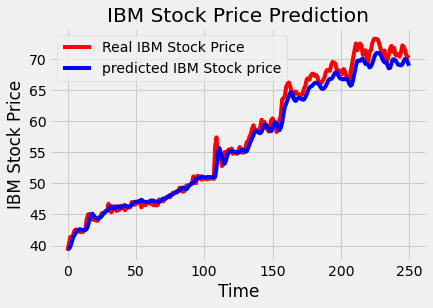

In [67]:
plot_prediction(test_set,predicted_stock_price)

In [71]:
return_rmse(test_set,predicted_stock_price)

The root mean sqaured error is 1.3337922543779552.


In [76]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.3))
# Second GRU layer
regressorGRU.add(GRU(units=80, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU.add(GRU(units=30, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 9s 215ms/step - loss: 0.0932
Epoch 2/50
19/19 [==============================] - 4s 196ms/step - loss: 0.0518
Epoch 3/50
19/19 [==============================] - 4s 224ms/step - loss: 0.0464
Epoch 4/50
19/19 [==============================] - 4s 202ms/step - loss: 0.0403
Epoch 5/50
19/19 [==============================] - 3s 179ms/step - loss: 0.0317
Epoch 6/50
19/19 [==============================] - 4s 189ms/step - loss: 0.0204
Epoch 7/50
19/19 [==============================] - 3s 182ms/step - loss: 0.0103
Epoch 8/50
19/19 [==============================] - 4s 201ms/step - loss: 0.0055
Epoch 9/50
19/19 [==============================] - 5s 267ms/step - loss: 0.0057
Epoch 10/50
19/19 [==============================] - 5s 246ms/step - loss: 0.0054
Epoch 11/50
19/19 [==============================] - 5s 282ms/step - loss: 0.0059
Epoch 12/50
19/19 [==============================] - 5s 276ms/step - loss: 0.0048
Epoch 13/50
19/19 [======

In [77]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

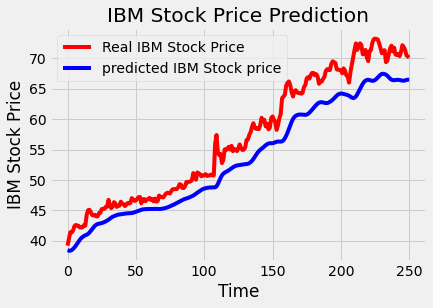

In [78]:
plot_prediction(test_set,predicted_stock_price)